In [12]:
# 1. Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# 2. Membaca dataset dari file advertising.csv
df = pd.read_csv("D:/Documents/Kuliah/Semester 5/Pembelajaran Mesin/PraktikumPembelajaranMesin/TA02/Dataset/advertising.csv")
print(df.head())


   Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
0           1             230.1                 37.8                     69.2   
1           2              44.5                 39.3                     45.1   
2           3              17.2                 45.9                     69.3   
3           4             151.5                 41.3                     58.5   
4           5             180.8                 10.8                     58.4   

   Sales ($)  
0       22.1  
1       10.4  
2        9.3  
3       18.5  
4       12.9  


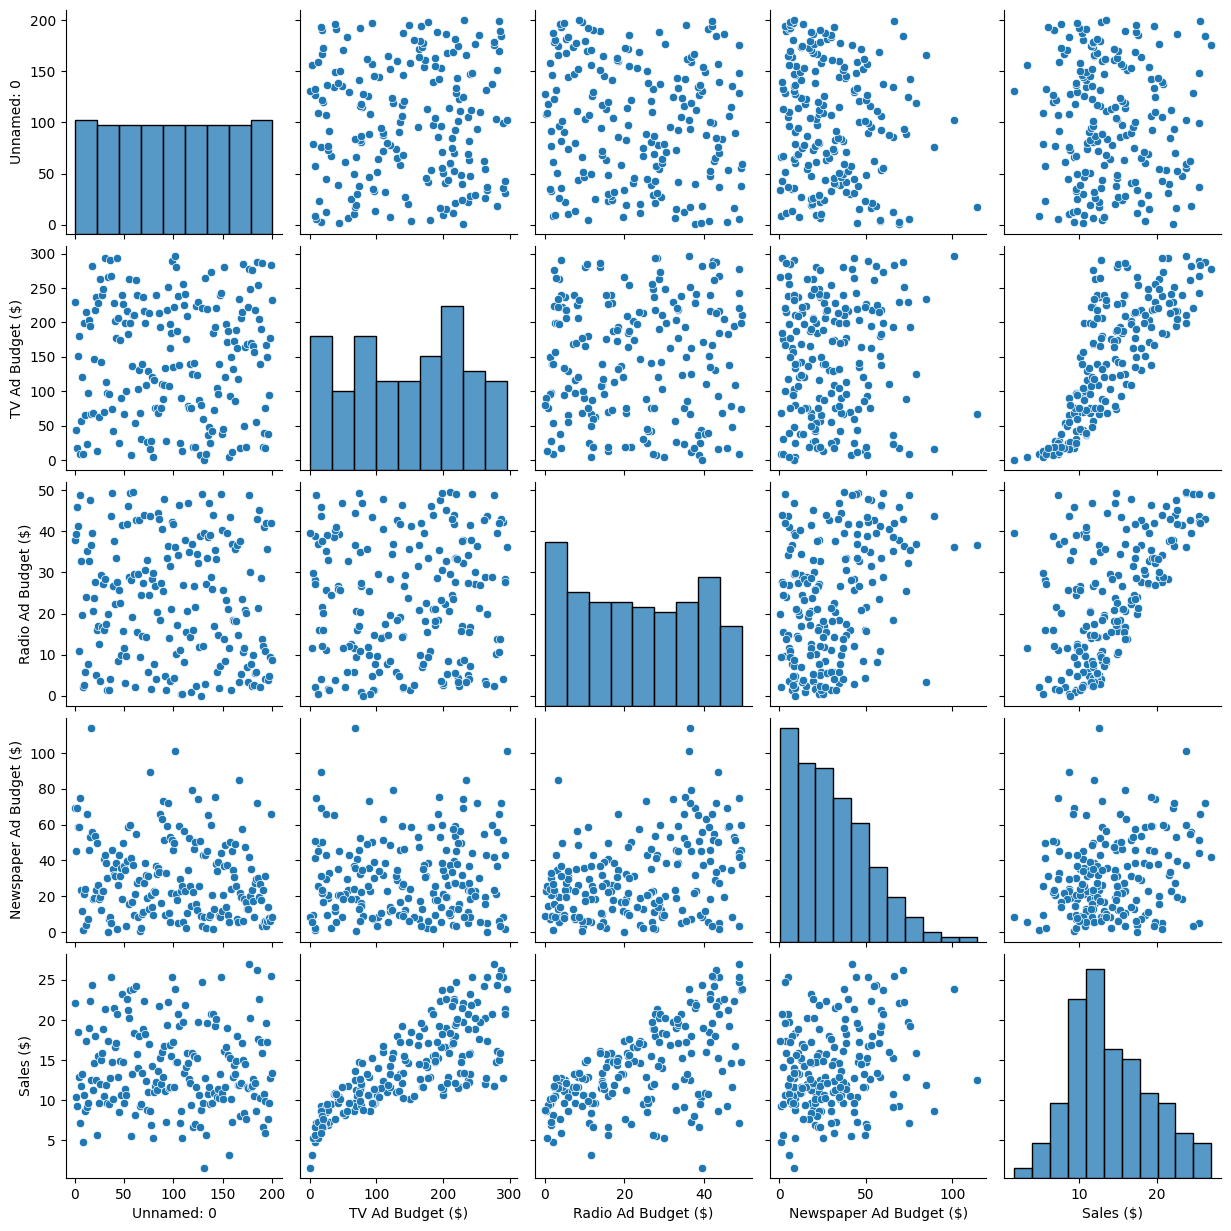

In [14]:
# 3. Visualisasi hubungan antar variabel
sns.pairplot(df)
plt.show()

In [15]:
# 4. Memisahkan fitur (X) dan target (y)
# Misalnya kita ingin melihat pengaruh TV, Radio, dan Newspaper terhadap Sales
X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]  # fitur
y = df['Sales ($)']  # target


In [16]:
# Membagi data menjadi data latih (training) dan data uji (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [17]:
# 5. Membuat instance dari model
model = LinearRegression()
# Melatih model menggunakan data training
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


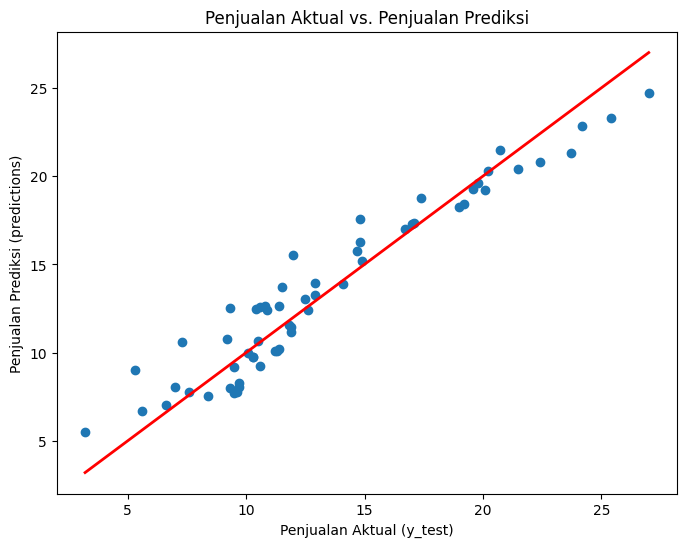

In [18]:
# 6. Melakukan prediksi pada data test
predictions = model.predict(X_test)

# Visualisasi hasil prediksi vs nilai aktual
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions)
plt.xlabel("Penjualan Aktual (y_test)")
plt.ylabel("Penjualan Prediksi (predictions)")
plt.title("Penjualan Aktual vs. Penjualan Prediksi")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2) # Garis ideal
plt.show()


In [20]:
# 7. Evaluasi performa model
mae = metrics.mean_absolute_error(y_test, predictions)
mse = metrics.mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1.213745773614481
Mean Squared Error (MSE): 2.2987166978863782
Root Mean Squared Error (RMSE): 1.516151937599388
R-squared (R2): 0.9185780903322446


In [21]:
# 8. Menampilkan intersep dan koefisien
print(f"Intercept: {model.intercept_}")
print(pd.DataFrame(model.coef_, X.columns, columns=['Coefficient']))

Intercept: 3.151526768070651
                         Coefficient
TV Ad Budget ($)            0.044696
Radio Ad Budget ($)         0.187566
Newspaper Ad Budget ($)    -0.000323
